## 1. exploration

In [2]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('student_extended_ml_dataset2.csv')

In [4]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


## Numeric Features in the dataset:
##### `Hours_Studied, Physics_Marks, Chemisty_Marks, Math_Marks.`
## Categorical Features present in the dataset: 
##### `Gender, Has_Part_Time_Job, Study_Hours_Group`
## Continous Features in dataset: 
##### `IQ, Age`


In [5]:
#checking missing values
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

There seem to be no `null` values to fix

In [6]:
df.describe()


,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


This is odd... the `mean`, `standard deviation`, `min`, `quatile splits` for each subject marks seem to be similar

In [7]:
#creating an average_marks feature
df['Average_Marks'] = df[['Chemistry_Marks','Math_Marks','Physics_Marks']].mean(axis=1).round(2)
df['Average_Marks'] 

0       71.67
1       73.67
2       65.33
3       79.67
4       75.33
        ...  
4995    79.00
4996    79.00
4997    81.00
4998    84.00
4999    65.33
Name: Average_Marks, Length: 5000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

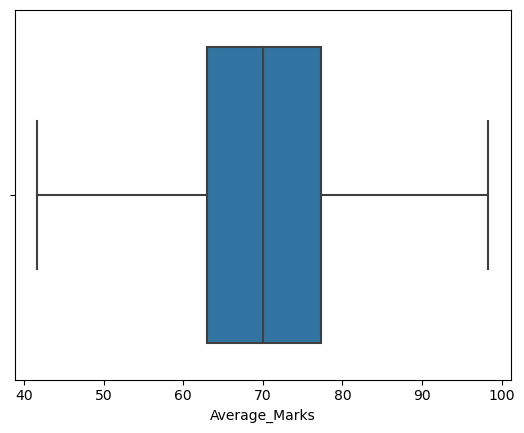

In [8]:
sns.boxplot(data=df, x="Average_Marks")
plt.show

no `outliers` found

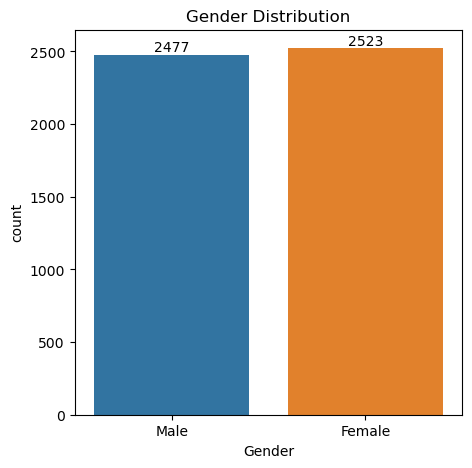

In [9]:

plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

data consists of slightly more `female` observations than `male`

Study_Hours_Group  High   Low
Gender                       
Female             1379  1144
Male               1384  1093


<Axes: xlabel='Gender'>

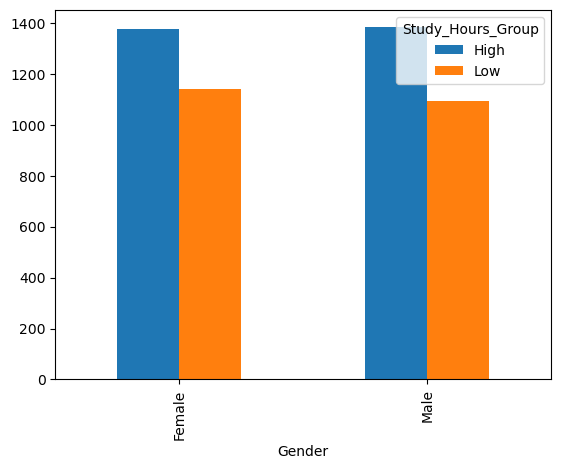

In [10]:
ct=pd.crosstab(index=df['Gender'],columns=df['Study_Hours_Group'])
print(ct)
ct.plot.bar()


no correlation between `study hours group` and `gender`

                   Math_Marks  Physics_Marks  Chemistry_Marks
Study_Hours_Group                                            
High                69.917843      70.456750        69.871516
Low                 69.690210      70.130979        69.708985


<function matplotlib.pyplot.show(close=None, block=None)>

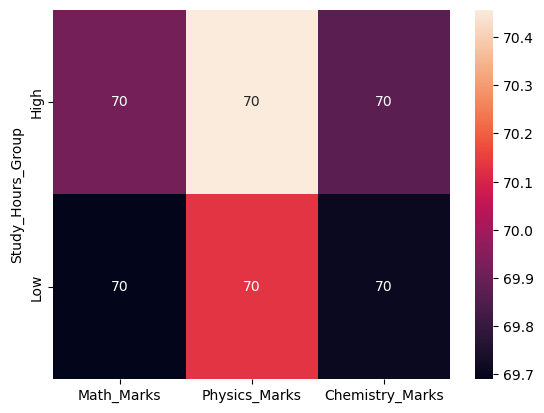

In [11]:
gb1=df.groupby("Study_Hours_Group").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
print(gb1)
sns.heatmap(gb1, annot = True)
plt.show


`gender` and `study group huors` arent correlated we can also conclude similarly `marks and study hours` and `gender` arent correlated either.

In [12]:
df['Age_Band'] = 0
df['IQ_Band'] = 0

age and IQ are `continous features` we should bin them into groups as machine learning models dont work well with continous features.

In [13]:
#getting quatiles to bin the data 
print(df['Age'].quantile([0.25, 0.5, 0.75]))
print(df['IQ'].quantile([0.25, 0.5, 0.75]))

0.25    24.0
0.50    32.0
0.75    38.0
Name: Age, dtype: float64
0.25     97.0
0.50    115.0
0.75    133.0
Name: IQ, dtype: float64


In [14]:
df.loc[(df['Age']<=24),'Age_Band']=0
df.loc[(df['Age']>24)&(df['Age']<=32),'Age_Band']=1
df.loc[(df['Age']>32)&(df['Age']<=38),'Age_Band']=2
df.loc[(df['Age']>38),'Age_Band']=4
df['Age_Band']


0       0
1       2
2       2
3       2
4       1
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Age_Band, Length: 5000, dtype: int64

In [15]:


df['Age_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_Band
1,1383
0,1287
4,1247
2,1083


most `observations` seem to be from 24-32 years of age

In [16]:
df.loc[(df['IQ']<=97),'IQ_Band']=0
df.loc[(df['IQ']>97)&(df['IQ']<=115),'IQ_Band']=1
df.loc[(df['IQ']>115)&(df['IQ']<=133),'IQ_Band']=2
df.loc[(df['IQ']>133),'IQ_Band']=4
df['IQ_Band']

0       0
1       1
2       2
3       4
4       0
       ..
4995    4
4996    2
4997    1
4998    4
4999    0
Name: IQ_Band, Length: 5000, dtype: int64

In [17]:


df['IQ_Band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,IQ_Band
0,1298
2,1270
1,1229
4,1203


oddly enough `IQ` seems to be about uniformly distributed...

(array([575., 549., 491., 364., 513., 532., 356., 560., 528., 532.]),
 array([18. , 20.7, 23.4, 26.1, 28.8, 31.5, 34.2, 36.9, 39.6, 42.3, 45. ]),
 <BarContainer object of 10 artists>)

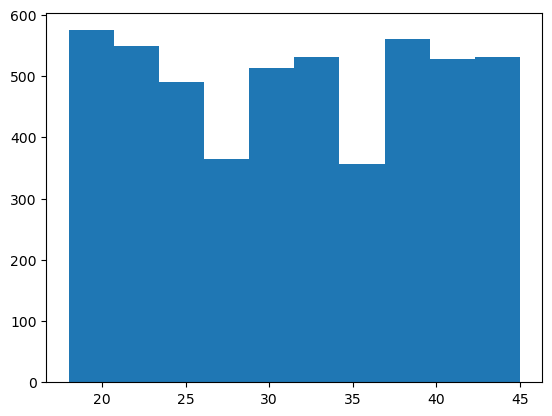

In [55]:
plt.hist(df['Age'], bins=10)

(array([474., 553., 471., 478., 474., 515., 494., 478., 500., 563.]),
 array([ 80.,  87.,  94., 101., 108., 115., 122., 129., 136., 143., 150.]),
 <BarContainer object of 10 artists>)

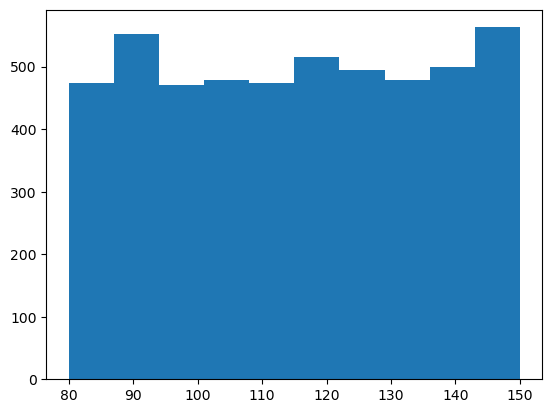

In [56]:
plt.hist(df['IQ'], bins=10)



IQ being `uniformly distributed` is an abnormality as in the real work IQ is said to have an Normal distribution

(array([ 53., 196., 410., 897., 928., 986., 862., 425., 197.,  46.]),
 array([41.67 , 47.336, 53.002, 58.668, 64.334, 70.   , 75.666, 81.332,
        86.998, 92.664, 98.33 ]),
 <BarContainer object of 10 artists>)

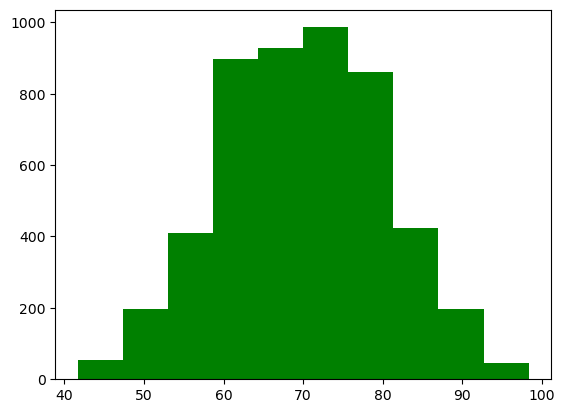

In [20]:
plt.hist(df['Average_Marks'], bins=10, color='green')

average_marks seems to be `normally distributed`

<function matplotlib.pyplot.show(close=None, block=None)>

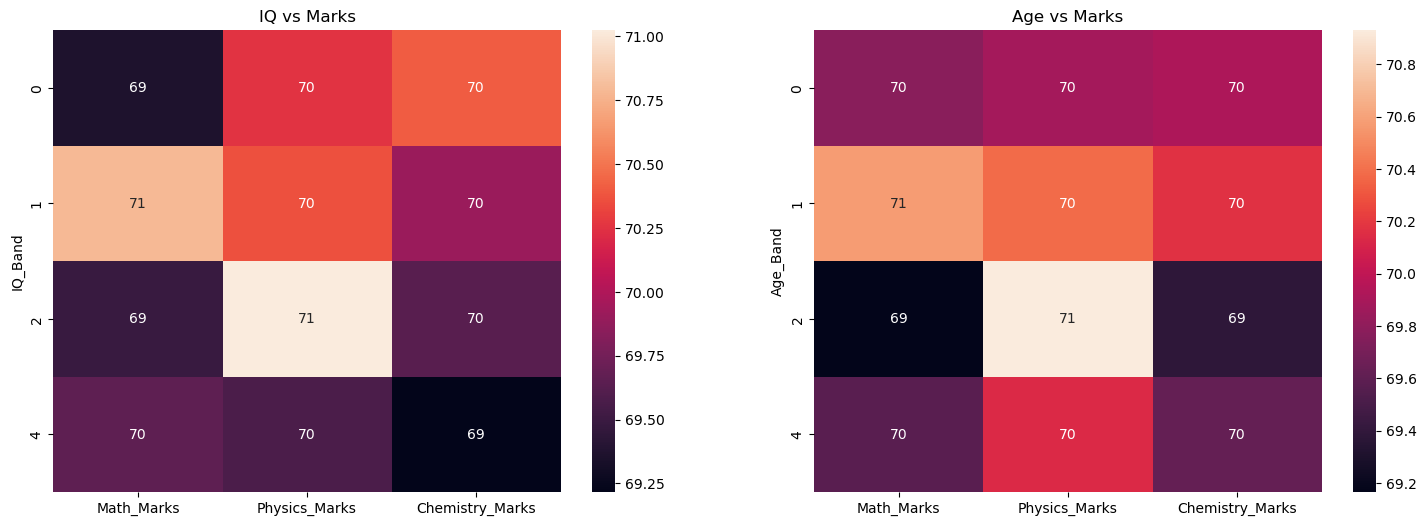

In [21]:
gb3=df.groupby("IQ_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
gb4=df.groupby("Age_Band").agg({"Math_Marks":"mean","Physics_Marks":"mean","Chemistry_Marks":"mean"})
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.heatmap(gb3,ax = ax[0],annot = True)
ax[0].set_title('IQ vs Marks')
sns.heatmap(gb4,ax = ax[1], annot = True)
ax[1].set_title('Age vs Marks')
plt.show

using the HeatMaps, we can tell IQ and marks `arent correlated at all`

## 2. data preprocessing and feature engineering

In [23]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.67,0,0
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.67,2,1
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.33,2,2
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.67,2,4
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,79.00,1,4
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,79.00,2,2
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,81.00,2,1
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,84.00,0,4


In [25]:
modelling_data_frame = df.copy()
modelling_data_frame.drop(['Name','Age','IQ','Average_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,Male,8.140821,87,43,85,True,High,0,0
1,Female,9.825626,86,81,54,False,High,2,1
2,Male,8.835372,87,52,57,True,High,2,2
3,Male,2.482483,70,86,83,False,Low,2,4
4,Female,4.419793,95,48,83,True,Low,1,0
...,...,...,...,...,...,...,...,...,...
4995,Female,3.653474,93,59,85,True,Low,1,4
4996,Female,1.096493,68,70,99,True,Low,2,2
4997,Male,4.156770,76,96,71,False,Low,2,1
4998,Female,6.788548,81,98,73,False,High,0,4


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
modelling_data_frame['Gender'] = le.fit_transform(modelling_data_frame['Gender'])
modelling_data_frame['Study_Hours_Group'] = le.fit_transform(modelling_data_frame['Study_Hours_Group'])
modelling_data_frame['Has_Part_Time_Job'] = le.fit_transform(modelling_data_frame['Has_Part_Time_Job'])
modelling_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,87,43,85,1,0,0,0
1,0,9.825626,86,81,54,0,0,2,1
2,1,8.835372,87,52,57,1,0,2,2
3,1,2.482483,70,86,83,0,1,2,4
4,0,4.419793,95,48,83,1,1,1,0
...,...,...,...,...,...,...,...,...,...
4995,0,3.653474,93,59,85,1,1,1,4
4996,0,1.096493,68,70,99,1,1,2,2
4997,1,4.156770,76,96,71,0,1,2,1
4998,0,6.788548,81,98,73,0,0,0,4


In [27]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 1, kernel = 'rbf')
kpca_values = modelling_data_frame[['Math_Marks','Physics_Marks','Chemistry_Marks']].to_numpy()
kpca_values.shape

(5000, 3)

In [28]:
kpca_values = kpca.fit_transform(kpca_values)
kpca_values.shape

(5000, 1)

In [29]:
kpca_values

array([[-0.00129306],
       [-0.00099639],
       [-0.00077624],
       ...,
       [-0.0007046 ],
       [-0.00096759],
       [-0.00091421]])

In [30]:
modelling_data_frame.drop(['Math_Marks','Physics_Marks','Chemistry_Marks'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,1,0,0,0
1,0,9.825626,0,0,2,1
2,1,8.835372,1,0,2,2
3,1,2.482483,0,1,2,4
4,0,4.419793,1,1,1,0
...,...,...,...,...,...,...
4995,0,3.653474,1,1,1,4
4996,0,1.096493,1,1,2,2
4997,1,4.156770,0,1,2,1
4998,0,6.788548,0,0,0,4


In [31]:
y = modelling_data_frame['Study_Hours_Group'].to_numpy()
y

array([0, 0, 0, ..., 1, 0, 1])

In [32]:
modelling_data_frame.drop(['Study_Hours_Group'], axis=1, inplace=True)
modelling_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Age_Band,IQ_Band
0,1,8.140821,1,0,0
1,0,9.825626,0,2,1
2,1,8.835372,1,2,2
3,1,2.482483,0,2,4
4,0,4.419793,1,1,0
...,...,...,...,...,...
4995,0,3.653474,1,1,4
4996,0,1.096493,1,2,2
4997,1,4.156770,0,2,1
4998,0,6.788548,0,0,4


In [33]:
#not considering gender as we previously saw it had no effect on study hours group
X = modelling_data_frame.iloc[:, 1: ].values
X.shape

(5000, 4)

## 3. modelling

In [34]:
X = np.concatenate([X, kpca_values], axis=1)
X

array([[ 8.14082056e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.29306370e-03],
       [ 9.82562647e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -9.96387798e-04],
       [ 8.83537190e+00,  1.00000000e+00,  2.00000000e+00,
         2.00000000e+00, -7.76238405e-04],
       ...,
       [ 4.15676969e+00,  0.00000000e+00,  2.00000000e+00,
         1.00000000e+00, -7.04597528e-04],
       [ 6.78854842e+00,  0.00000000e+00,  0.00000000e+00,
         4.00000000e+00, -9.67589210e-04],
       [ 1.62711148e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00, -9.14214770e-04]])

In [35]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.018621
0:	learn: 0.6444531	total: 50.3ms	remaining: 50.3s
1:	learn: 0.5994297	total: 52.4ms	remaining: 26.2s
2:	learn: 0.5541030	total: 54.4ms	remaining: 18.1s
3:	learn: 0.5117289	total: 56.7ms	remaining: 14.1s
4:	learn: 0.4734685	total: 58.4ms	remaining: 11.6s
5:	learn: 0.4382532	total: 60.4ms	remaining: 10s
6:	learn: 0.4069933	total: 62.1ms	remaining: 8.8s
7:	learn: 0.3817292	total: 64ms	remaining: 7.93s
8:	learn: 0.3527574	total: 65.6ms	remaining: 7.23s
9:	learn: 0.3246008	total: 67.2ms	remaining: 6.65s
10:	learn: 0.2986413	total: 68.9ms	remaining: 6.2s
11:	learn: 0.2759942	total: 71.1ms	remaining: 5.85s
12:	learn: 0.2558183	total: 72.3ms	remaining: 5.49s
13:	learn: 0.2363410	total: 73.5ms	remaining: 5.17s
14:	learn: 0.2224268	total: 75.5ms	remaining: 4.96s
15:	learn: 0.2085773	total: 77.9ms	remaining: 4.79s
16:	learn: 0.1941224	total: 81.3ms	remaining: 4.7s
17:	learn: 0.1805785	total: 83.5ms	remaining: 4.55s
18:	learn: 0.1698652	total: 86.5ms	remaining: 4.46s

175:	learn: 0.0017836	total: 557ms	remaining: 2.61s
176:	learn: 0.0017657	total: 560ms	remaining: 2.6s
177:	learn: 0.0017512	total: 563ms	remaining: 2.6s
178:	learn: 0.0017308	total: 567ms	remaining: 2.6s
179:	learn: 0.0017105	total: 570ms	remaining: 2.59s
180:	learn: 0.0017001	total: 572ms	remaining: 2.59s
181:	learn: 0.0016867	total: 575ms	remaining: 2.58s
182:	learn: 0.0016727	total: 578ms	remaining: 2.58s
183:	learn: 0.0016573	total: 582ms	remaining: 2.58s
184:	learn: 0.0016445	total: 585ms	remaining: 2.58s
185:	learn: 0.0016280	total: 588ms	remaining: 2.57s
186:	learn: 0.0016140	total: 591ms	remaining: 2.57s
187:	learn: 0.0015982	total: 594ms	remaining: 2.56s
188:	learn: 0.0015842	total: 597ms	remaining: 2.56s
189:	learn: 0.0015758	total: 600ms	remaining: 2.56s
190:	learn: 0.0015649	total: 603ms	remaining: 2.56s
191:	learn: 0.0015513	total: 607ms	remaining: 2.55s
192:	learn: 0.0015356	total: 610ms	remaining: 2.55s
193:	learn: 0.0015260	total: 612ms	remaining: 2.54s
194:	learn: 0.0

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[553   0]
 [  0 447]]


1.0

In [40]:
#to check for overfitting 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.017802
0:	learn: 0.6473733	total: 4.6ms	remaining: 4.59s
1:	learn: 0.6032483	total: 7.58ms	remaining: 3.78s
2:	learn: 0.5601490	total: 10.7ms	remaining: 3.54s
3:	learn: 0.5198175	total: 13.8ms	remaining: 3.44s
4:	learn: 0.4831932	total: 16.8ms	remaining: 3.33s
5:	learn: 0.4492527	total: 19.6ms	remaining: 3.24s
6:	learn: 0.4190686	total: 22.7ms	remaining: 3.22s
7:	learn: 0.3944944	total: 25.7ms	remaining: 3.19s
8:	learn: 0.3663294	total: 28.6ms	remaining: 3.15s
9:	learn: 0.3387943	total: 31.4ms	remaining: 3.1s
10:	learn: 0.3132100	total: 34.3ms	remaining: 3.08s
11:	learn: 0.2907180	total: 37.3ms	remaining: 3.07s
12:	learn: 0.2704762	total: 39.6ms	remaining: 3.01s
13:	learn: 0.2508446	total: 41.7ms	remaining: 2.94s
14:	learn: 0.2368159	total: 44.7ms	remaining: 2.93s
15:	learn: 0.2227760	total: 47.8ms	remaining: 2.94s
16:	learn: 0.2081187	total: 50.5ms	remaining: 2.92s
17:	learn: 0.1942556	total: 52.7ms	remaining: 2.87s
18:	learn: 0.1832438	total: 55.5ms	remaining: 

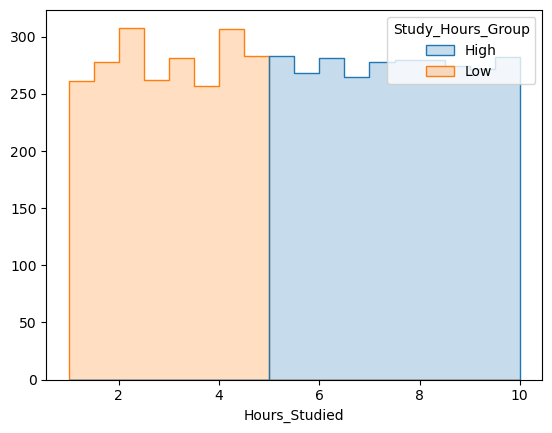

In [61]:
#hours studied and study group hours 
sns.histplot(data=df, x='Hours_Studied', hue='Study_Hours_Group', element='step', common_norm=False)
plt.xlabel('Hours_Studied')
plt.ylabel('')
plt.show()


we can see above the ~5hr threshold the study hours group is `high`
therefore `study_hours_group` might not have been a dependant variable after all.

### Trying to predict average marks.

In [41]:
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,71.67,0,0
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,73.67,2,1
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,65.33,2,2
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,79.67,2,4
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,79.00,1,4
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,79.00,2,2
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,81.00,2,1
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,84.00,0,4


In [42]:
regression_data_frame = df.copy()
regression_data_frame.drop(['Name','Age','IQ'], axis=1, inplace=True)
regression_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,Male,8.140821,87,43,85,True,High,71.67,0,0
1,Female,9.825626,86,81,54,False,High,73.67,2,1
2,Male,8.835372,87,52,57,True,High,65.33,2,2
3,Male,2.482483,70,86,83,False,Low,79.67,2,4
4,Female,4.419793,95,48,83,True,Low,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,Female,3.653474,93,59,85,True,Low,79.00,1,4
4996,Female,1.096493,68,70,99,True,Low,79.00,2,2
4997,Male,4.156770,76,96,71,False,Low,81.00,2,1
4998,Female,6.788548,81,98,73,False,High,84.00,0,4


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
regression_data_frame['Gender'] = le.fit_transform(regression_data_frame['Gender'])
regression_data_frame['Study_Hours_Group'] = le.fit_transform(regression_data_frame['Study_Hours_Group'])
regression_data_frame['Has_Part_Time_Job'] = le.fit_transform(regression_data_frame['Has_Part_Time_Job'])
regression_data_frame

,Gender,Hours_Studied,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,1,8.140821,87,43,85,1,0,71.67,0,0
1,0,9.825626,86,81,54,0,0,73.67,2,1
2,1,8.835372,87,52,57,1,0,65.33,2,2
3,1,2.482483,70,86,83,0,1,79.67,2,4
4,0,4.419793,95,48,83,1,1,75.33,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,3.653474,93,59,85,1,1,79.00,1,4
4996,0,1.096493,68,70,99,1,1,79.00,2,2
4997,1,4.156770,76,96,71,0,1,81.00,2,1
4998,0,6.788548,81,98,73,0,0,84.00,0,4


In [44]:
regression_data_frame.drop(['Math_Marks','Physics_Marks','Chemistry_Marks'], axis=1, inplace=True)
regression_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Average_Marks,Age_Band,IQ_Band
0,1,8.140821,1,0,71.67,0,0
1,0,9.825626,0,0,73.67,2,1
2,1,8.835372,1,0,65.33,2,2
3,1,2.482483,0,1,79.67,2,4
4,0,4.419793,1,1,75.33,1,0
...,...,...,...,...,...,...,...
4995,0,3.653474,1,1,79.00,1,4
4996,0,1.096493,1,1,79.00,2,2
4997,1,4.156770,0,1,81.00,2,1
4998,0,6.788548,0,0,84.00,0,4


In [45]:
y = regression_data_frame['Average_Marks'].to_numpy()
y

array([71.67, 73.67, 65.33, ..., 81.  , 84.  , 65.33])

In [46]:
regression_data_frame.drop(['Average_Marks'], axis=1, inplace=True)
regression_data_frame

,Gender,Hours_Studied,Has_Part_Time_Job,Study_Hours_Group,Age_Band,IQ_Band
0,1,8.140821,1,0,0,0
1,0,9.825626,0,0,2,1
2,1,8.835372,1,0,2,2
3,1,2.482483,0,1,2,4
4,0,4.419793,1,1,1,0
...,...,...,...,...,...,...
4995,0,3.653474,1,1,1,4
4996,0,1.096493,1,1,2,2
4997,1,4.156770,0,1,2,1
4998,0,6.788548,0,0,0,4


In [47]:
#not considering gender as we previously saw it had no effect on study hours group
X = modelling_data_frame.iloc[:, 1: ].values
X.shape

(5000, 4)

In [48]:
# X = np.concatenate([X, kpca_values], axis=1)
X

array([[8.14082056, 1.        , 0.        , 0.        ],
       [9.82562647, 0.        , 2.        , 1.        ],
       [8.8353719 , 1.        , 2.        , 2.        ],
       ...,
       [4.15676969, 0.        , 2.        , 1.        ],
       [6.78854842, 0.        , 0.        , 4.        ],
       [1.62711148, 1.        , 2.        , 0.        ]])

In [49]:
y

array([71.67, 73.67, 65.33, ..., 81.  , 84.  , 65.33])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.050969
0:	learn: 10.1469906	total: 868us	remaining: 867ms
1:	learn: 10.1419450	total: 1.95ms	remaining: 974ms
2:	learn: 10.1412633	total: 2.72ms	remaining: 903ms
3:	learn: 10.1376876	total: 3.93ms	remaining: 978ms
4:	learn: 10.1319021	total: 5.03ms	remaining: 1s
5:	learn: 10.1269697	total: 6.07ms	remaining: 1s
6:	learn: 10.1220853	total: 7.09ms	remaining: 1.01s
7:	learn: 10.1197544	total: 8.19ms	remaining: 1.01s
8:	learn: 10.1155123	total: 9.21ms	remaining: 1.01s
9:	learn: 10.1122837	total: 10.5ms	remaining: 1.04s
10:	learn: 10.1083799	total: 11.8ms	remaining: 1.06s
11:	learn: 10.1073269	total: 12.5ms	remaining: 1.03s
12:	learn: 10.1066043	total: 13.4ms	remaining: 1.01s
13:	learn: 10.1039259	total: 14.6ms	remaining: 1.03s
14:	learn: 10.1009804	total: 15.8ms	remaining: 1.04s
15:	learn: 10.0997005	total: 16.9ms	remaining: 1.04s
16:	learn: 10.0978785	total: 18.2ms	remaining: 1.05s
17:	learn: 10.0940968	total: 19.4ms	remaining: 1.05s
18:	learn: 10.0910001	total: 20.6

769:	learn: 9.0848835	total: 904ms	remaining: 270ms
770:	learn: 9.0835778	total: 905ms	remaining: 269ms
771:	learn: 9.0818651	total: 907ms	remaining: 268ms
772:	learn: 9.0803859	total: 908ms	remaining: 267ms
773:	learn: 9.0794411	total: 909ms	remaining: 266ms
774:	learn: 9.0792189	total: 911ms	remaining: 264ms
775:	learn: 9.0777329	total: 912ms	remaining: 263ms
776:	learn: 9.0774759	total: 914ms	remaining: 262ms
777:	learn: 9.0760717	total: 915ms	remaining: 261ms
778:	learn: 9.0751670	total: 916ms	remaining: 260ms
779:	learn: 9.0736096	total: 918ms	remaining: 259ms
780:	learn: 9.0725209	total: 919ms	remaining: 258ms
781:	learn: 9.0718141	total: 921ms	remaining: 257ms
782:	learn: 9.0704667	total: 922ms	remaining: 256ms
783:	learn: 9.0691849	total: 924ms	remaining: 255ms
784:	learn: 9.0677030	total: 925ms	remaining: 253ms
785:	learn: 9.0666624	total: 927ms	remaining: 252ms
786:	learn: 9.0658973	total: 928ms	remaining: 251ms
787:	learn: 9.0648086	total: 929ms	remaining: 250ms
788:	learn: 

In [60]:
y_pred = regressor.predict(X_test)
y_pred

array([69.99937429, 68.66941269, 69.40847523, 61.49272276, 66.85845422,
       71.94213021, 69.65874231, 72.00440712, 72.49843006, 69.75302738,
       65.21595445, 67.76251191, 71.63425344, 67.58807465, 69.4182456 ,
       71.20297795, 70.46222471, 66.31673554, 71.6314547 , 68.40072412,
       70.07836708, 68.11648449, 72.22991103, 72.95222121, 66.56344492,
       69.05240858, 69.96852219, 67.89198642, 71.89868554, 67.82225811,
       70.11928741, 70.69144184, 68.04292299, 67.17501357, 71.10301066,
       68.12930314, 69.77480128, 78.61210735, 71.3318665 , 69.64876464,
       71.19586405, 70.48433945, 70.19540716, 68.43391523, 68.31909001,
       69.67480305, 73.00683871, 69.90085382, 69.80254362, 69.69741426,
       68.48453133, 58.26084542, 69.11105127, 64.21200885, 68.69408388,
       73.92439277, 67.51441082, 63.32970101, 70.96493286, 71.38663014,
       68.50916766, 70.98055739, 70.3692641 , 71.29774975, 71.11771808,
       72.52185368, 66.2498199 , 72.26424688, 69.67444578, 68.48

In [63]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, y_pred)
print(round(error,3))

8.478


We got a `mean_absolute_error` of `8.478`, which means the regression model predicted values were off by around `8.478` marks.